In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
%matplotlib inline

In [16]:
cases = pd.read_json('https://data.cdc.gov/resource/9mfq-cb36.json?$limit=35000') # limit is required to pull more rows
# if len says at limit, increase the value

In [17]:
cases.head()

,conf_cases,conf_death,consent_cases,consent_deaths,created_at,new_case,new_death,pnew_case,pnew_death,prob_cases,prob_death,state,submission_date,tot_cases,tot_death
0,NaN,NaN,Not agree,Not agree,2021-01-27 00:00:00.000,646,15,0.0,0.0,NaN,NaN,NE,2021-01-25T00:00:00.000,187923,1894
1,1130917.0,19306.0,Agree,Agree,2021-02-03 14:55:58.025,2304,63,0.0,16.0,0.0,2030.0,IL,2021-02-02T00:00:00.000,1130917,21336
2,3497.0,122.0,Agree,Agree,2020-07-31 14:35:06.518,22,2,2.0,0.0,413.0,1.0,ME,2020-07-30T00:00:00.000,3910,123
3,NaN,NaN,Not agree,Not agree,2020-05-04 22:49:24.344,89,2,0.0,0.0,NaN,NaN,NH,2020-05-03T00:00:00.000,2518,86
4,NaN,6746.0,Not agree,Agree,2020-12-04 00:00:00.000,7899,91,0.0,1.0,NaN,285.0,IN,2020-12-04T00:00:00.000,367338,7031


In [18]:
len(cases)

33180

In [19]:
cases['state'].unique()

array(['NE', 'IL', 'ME', 'NH', 'IN', 'GU', 'CA', 'CT', 'NV', 'ND', 'MO',
       'MD', 'DE', 'WI', 'VT', 'MI', 'VI', 'NC', 'AL', 'MT', 'WA', 'MS',
       'ID', 'OR', 'FSM', 'NJ', 'DC', 'RI', 'SC', 'MN', 'KY', 'AZ', 'WY',
       'VA', 'LA', 'KS', 'TX', 'AR', 'MP', 'PW', 'FL', 'MA', 'NYC', 'GA',
       'OK', 'AK', 'HI', 'UT', 'WV', 'PR', 'CO', 'AS', 'TN', 'NY', 'SD',
       'NM', 'OH', 'IA', 'PA', 'RMI'], dtype=object)

In [20]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33180 entries, 0 to 33179
Data columns (total 15 columns):
conf_cases         16459 non-null float64
conf_death         16392 non-null float64
consent_cases      30415 non-null object
consent_deaths     30415 non-null object
created_at         33180 non-null datetime64[ns]
new_case           33180 non-null int64
new_death          33180 non-null int64
pnew_case          28896 non-null float64
pnew_death         28836 non-null float64
prob_cases         16388 non-null float64
prob_death         16392 non-null float64
state              33180 non-null object
submission_date    33180 non-null object
tot_cases          33180 non-null int64
tot_death          33180 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 3.8+ MB


In [21]:
la_case = cases[cases['state']=='LA'].copy()
la_case.head()

,conf_cases,conf_death,consent_cases,consent_deaths,created_at,new_case,new_death,pnew_case,pnew_death,prob_cases,prob_death,state,submission_date,tot_cases,tot_death
6379,NaN,5402.0,Not agree,Agree,2020-10-07 13:45:01.309,532,6,0.0,0.0,NaN,190.0,LA,2020-10-06T00:00:00.000,170469,5592
6390,NaN,7631.0,Not agree,Agree,2021-01-15 14:46:04.456,5313,58,2187.0,9.0,NaN,449.0,LA,2021-01-14T00:00:00.000,361148,8080
6391,NaN,4403.0,Not agree,Agree,2020-08-18 14:26:55.280,567,19,0.0,0.0,NaN,123.0,LA,2020-08-17T00:00:00.000,138485,4526
6394,NaN,6813.0,Not agree,Agree,2020-12-23 14:36:58.341,3699,51,933.0,13.0,NaN,345.0,LA,2020-12-22T00:00:00.000,290960,7158
6397,NaN,NaN,Not agree,Agree,2020-03-26 16:22:39.452,0,0,NaN,NaN,NaN,NaN,LA,2020-02-08T00:00:00.000,0,0


In [22]:
la_case['date'] = pd.to_datetime(la_case['created_at'])

In [24]:
la_case['date'].dtype

dtype('<M8[ns]')

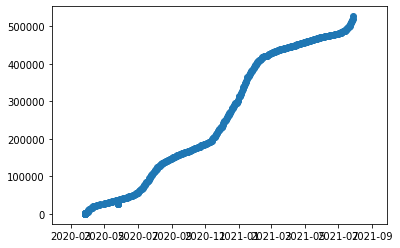

In [25]:
plt.scatter(la_case['date'],la_case['tot_cases'])

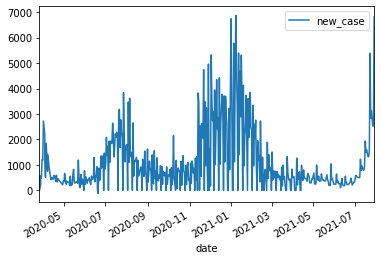

In [26]:
la_case.plot('date','new_case')

In [27]:
la_case['seven_day_case_avg'] = la_case['new_case'].rolling(7,1).mean()

In [28]:
la_case.sort_values(by='date', inplace=True)

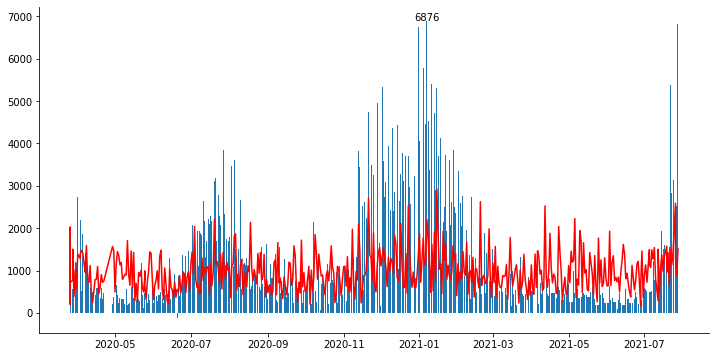

In [29]:
fig,ax = plt.subplots(figsize=(12,6))

p1 = ax.plot(la_case['date'].dt.date, la_case['seven_day_case_avg'], c='r')
b1 = ax.bar(la_case['date'].dt.date, la_case['new_case'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#annotate
value = la_case['new_case'].max()
peak_date = la_case.loc[la_case['new_case'].idxmax()]['date'].date()
ax.annotate(str(value),(peak_date,value+20), ha='center')

plt.show()

In [30]:
import datetime as dt

In [31]:
offset_date = dt.date.today()-dt.timedelta(90)

In [32]:
la_case_3m = la_case[la_case['date'].dt.date>offset_date].copy()

In [33]:
la_case.iloc[0]

conf_cases                                   NaN
conf_death                                   NaN
consent_cases                          Not agree
consent_deaths                             Agree
created_at            2020-03-26 16:22:39.452000
new_case                                       0
new_death                                      0
pnew_case                                    NaN
pnew_death                                   NaN
prob_cases                                   NaN
prob_death                                   NaN
state                                         LA
submission_date          2020-03-02T00:00:00.000
tot_cases                                      0
tot_death                                      0
date                  2020-03-26 16:22:39.452000
seven_day_case_avg                          1119
Name: 9442, dtype: object

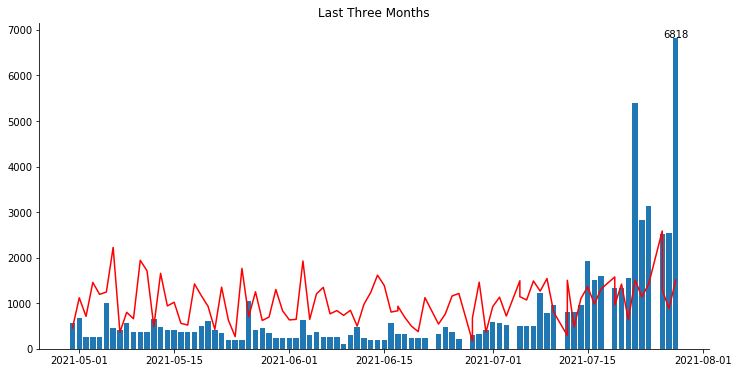

In [34]:
fig,ax = plt.subplots(figsize=(12,6))

p1 = ax.plot(la_case_3m['date'].dt.date, la_case_3m['seven_day_case_avg'], c='r')
b1 = ax.bar(la_case_3m['date'].dt.date, la_case_3m['new_case'])

ax.set_title('Last Three Months')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#annotate
value = la_case_3m['new_case'].max()
peak_date = la_case_3m.loc[la_case_3m['new_case'].idxmax()]['date'].date()
ax.annotate(str(value),(peak_date,value+10), ha='center')

plt.show()

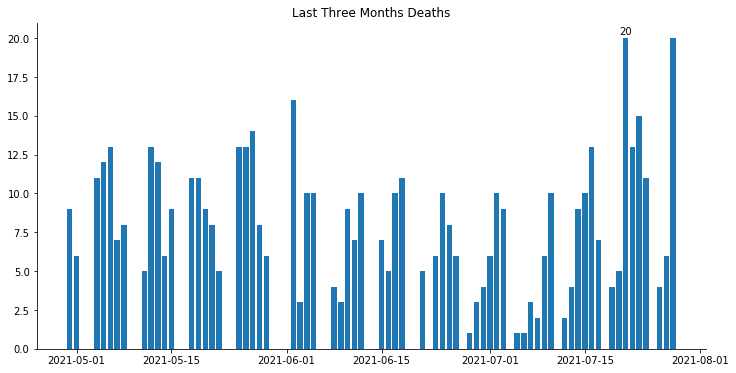

In [35]:
fig,ax = plt.subplots(figsize=(12,6))

# p1 = ax.plot(la_case_3m['date'].dt.date, la_case_3m['seven_day_case_avg'], c='k')
b1 = ax.bar(la_case_3m['date'].dt.date, la_case_3m['new_death'])

ax.set_title('Last Three Months Deaths')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#annotate
value = la_case_3m['new_death'].max()
peak_date = la_case_3m.loc[la_case_3m['new_death'].idxmax()]['date'].date()
ax.annotate(str(value),(peak_date,value+.25), ha='center')

plt.show()

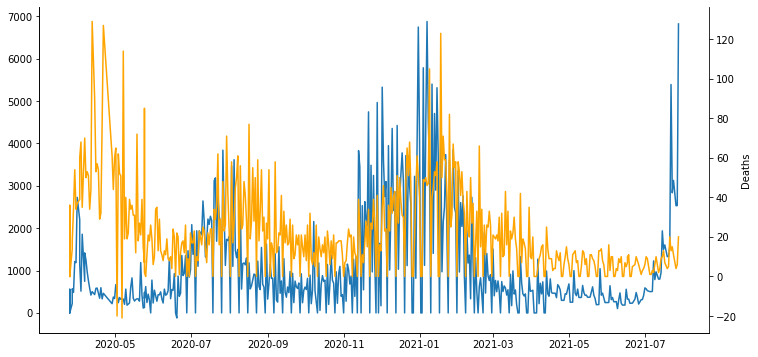

In [42]:
fig,ax = plt.subplots(figsize=(12,6))

# p1 = ax.plot(la_case['date'].dt.date, la_case['seven_day_case_avg'], c='r')
b1 = ax.plot(la_case['date'].dt.date, la_case['new_case'])


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
b2 = ax2.plot(la_case['date'].dt.date, la_case['new_death'], c='orange')
ax2.set_ylabel("Deaths")

ax2.spines['top'].set_visible(False)

plt.show()

In [37]:
from sklearn.preprocessing import scale

In [38]:
la_case_death = la_case[['new_case','new_death']]
la_case_death.describe()

,new_case,new_death
count,553.000000,553.000000
mean,952.602170,19.772152
std,1187.323562,21.537686
min,-119.000000,-21.000000
25%,227.000000,2.000000
50%,514.000000,13.000000
75%,1187.000000,29.000000
max,6876.000000,129.000000


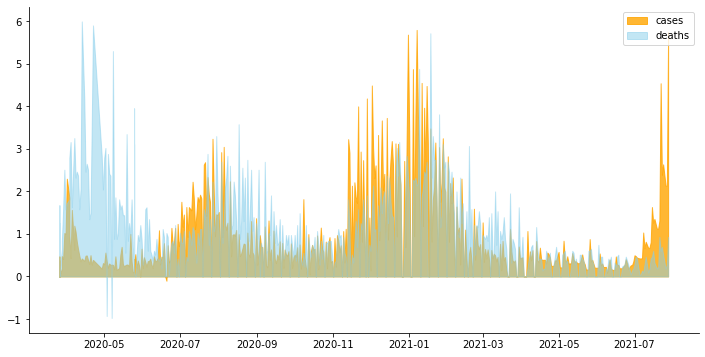

In [39]:
fig,ax = plt.subplots(figsize=(12,6))

# p1 = ax.plot(la_case['date'].dt.date, la_case['seven_day_case_avg'], c='r')
b1 = ax.fill_between(la_case['date'].dt.date, scale(la_case['new_case'],with_mean=False),
                     color='orange', alpha=0.8, label='cases')
b2 = ax.fill_between(la_case['date'].dt.date, scale(la_case['new_death'],with_mean=False),
                     color='skyblue', alpha=0.5, label='deaths')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend()

plt.show()

In [40]:
la_case[['date','new_case','new_death']].tail(30)

,date,new_case,new_death
32098,2021-06-29 14:25:53.077,316,3
7243,2021-06-30 14:11:39.088,413,4
31678,2021-07-01 14:29:33.934,591,6
32749,2021-07-02 13:55:07.236,568,10
7873,2021-07-03 13:44:06.775,525,9
33080,2021-07-05 13:25:13.278,503,1
9163,2021-07-05 14:30:02.367,503,1
30448,2021-07-06 13:52:24.339,503,1
7557,2021-07-07 14:48:49.531,508,3
30001,2021-07-08 14:26:57.178,1226,2
